# Team Members
| Name            | ID       |
| :---            | :---     |
| Somaya Mohammed | 20200234 |
| Dina Ahmed      | 20201061 |
| Eman Ibrahim    | 20201038 |
| Mariem Shehab   | 20200844 |
| Norhan Sayed    | 20201200 |

## (1) Objectives:
• Acquire proficiency in using the Tensorflow framework and the Scikit-Learn library.
<br>
• Familiarize yourself with Artificial Neural Networks (ANNs) and K-NearestNeighbors (K-NN).
<br>
• Attain a comprehension of the concept of hyperparameter tuning.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## (2) Approaching the project:

### (a) Data Exploration and preparation:
• Load the dataset.
<br>
• Normalize each image by dividing each pixel by 255.
<br>
• Resize images to dimensions of 28 by 28. After resizing, visualize some images to verify the correctness of the reshaping process.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# Load the dataset
mnist_test = pd.read_csv('drive/MyDrive/Colab Notebooks/mnist_test.csv')
mnist_test.shape

(10000, 785)

In [16]:
mnist_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


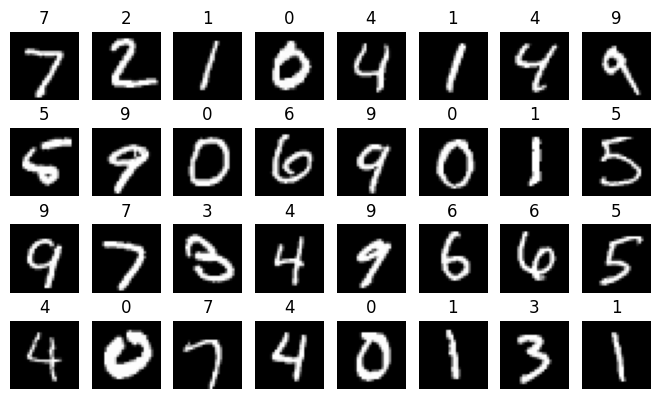

In [17]:
plt.subplots_adjust(left = 0, right = 1)
for index in range(4*8):
    plt.subplot(4, 8, index + 1)
    #Resize images to dimensions of 28 by 28
    plt.title(mnist_test['label'].iloc[index])
    plt.imshow(mnist_test.drop(columns = ['label']).iloc[index].values.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [18]:
# Split the features and target of testing data (mnist_test)
X_test = mnist_test.drop(columns = ['label'])
y_test = mnist_test["label"]
print(X_test.shape, y_test.shape)

(10000, 784) (10000,)


In [19]:
# Normalize each image by dividing each pixel by 255.
X_test = X_test/255

In [20]:
# Resize images to dimensions of 28 by 28. After resizing, visualize some images to verify the
# correctness of the reshaping process.
X_test = X_test.to_numpy().reshape((-1, 28, 28))
X_test.shape

(10000, 28, 28)

# (b) Experiments and results:
### testing data
Save the best model, then reload it in a separate file, and use it on the testing data loaded from mnist_test.csv.

In [ ]:
from sklearn.metrics import accuracy_score
import pickle

In [31]:
# load the model
pickle_in = open('best_model.pickle', 'rb')
best_model = pickle.load(pickle_in)
best_model

In [38]:
# check if the best model is ANN not KNN
str(type(best_model)) == '<class \'keras.src.engine.sequential.Sequential\'>'

True

In [40]:
# predict values with the best model.
y_test_pred = None
if(str(type(best_model)) == '<class \'keras.src.engine.sequential.Sequential\'>'):
  y_test_pred = best_model.predict(X_test) # ANN
else:
  y_test_pred = best_model.predict(X_test.reshape(-1, 28*28)) # KNN

print(f'y prediction shape: {y_test_pred.shape}') # y_prediction is array of 10 columns.

# get the label with highest value.
y_test_pred = np.argmax(y_test_pred, axis=1)
print(f'y prediction shape: {y_test_pred.shape}, after get only label with highest value') # now y_prediction is array of only one column.

predicted_table = pd.DataFrame({'Y Prediction': y_test_pred, 'Actual Y Test': y_test})
predicted_table

313/313 [==============================] - 1s 2ms/step
y prediction shape: (10000, 10)
y prediction shape: (10000,), after get only label with highest value


,Y Prediction,Actual Y Test
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [41]:
# get score of the best model
score = accuracy_score(y_test, y_test_pred)
print(f'Model Score: {float("{:.3f}".format(score*100))}%')

Model Score: 97.85%


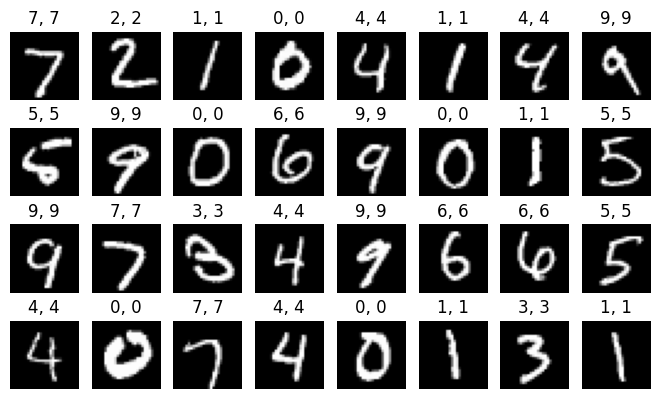

In [43]:
plt.subplots_adjust(left = 0, right = 1)
for i in range(4*8):
    plt.subplot(4, 8, i + 1)
    plt.title(f'{y_test.iloc[i]}, {y_test_pred[i]}')
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
plt.show()